In [ ]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')
from io import StringIO
import zipfile
from pathlib import Path
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func
from sqlalchemy import select
from sqlalchemy import create_engine
from requests.api import head
from sqlalchemy.dialects.mysql import insert
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#Read dataframe.
demographic_ml_df=pd.read_csv("/content/demographic_ml_df.csv",header=0)
demographic_ml_df

,Unnamed: 0,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,...,unknown_demographic,male_60,male_other,Male total,total,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,0,2001,Afghanistan,Australia,0,0,0,0,0,0,...,6262,0,0,0,6262,1914.0,0.0,522.0,10.0,2446.0
1,1,2001,Afghanistan,Austria,0,0,0,0,0,0,...,1049,0,0,0,1049,432.0,0.0,335.0,0.0,767.0
2,2,2001,Afghanistan,Azerbaijan,0,8,12,10,38,0,...,0,0,0,175,243,226.0,0.0,45.0,0.0,271.0
3,3,2001,Afghanistan,Belarus,0,9,40,36,81,6,...,0,5,0,282,454,85.0,0.0,25.0,51.0,161.0
4,4,2001,Afghanistan,Belgium,0,0,0,0,0,0,...,0,0,213,213,357,100.0,0.0,42.0,0.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61194,61194,2021,Zimbabwe,Sweden,0,0,0,0,0,0,...,16,0,0,0,16,0.0,0.0,16.0,0.0,16.0
61195,61195,2021,Zimbabwe,Switzerland,0,0,9,0,0,0,...,0,0,0,0,9,0.0,0.0,5.0,0.0,5.0
61196,61196,2021,Zimbabwe,Thailand,0,0,0,0,0,0,...,0,0,0,9,9,NaN,NaN,NaN,NaN,NaN
61197,61197,2021,Zimbabwe,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,...,1174,0,0,0,1174,44.0,5.0,53.0,10.0,112.0


In [ ]:
#Renaming Columns.
demographic_ml_df=demographic_ml_df.rename(columns={"Female total":"female_total","Male total":"male_total","total":"total_gender"})
demographic_ml_df

,Unnamed: 0,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,...,unknown_demographic,male_60,male_other,male_total,total_gender,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,0,2001,Afghanistan,Australia,0,0,0,0,0,0,...,6262,0,0,0,6262,1914.0,0.0,522.0,10.0,2446.0
1,1,2001,Afghanistan,Austria,0,0,0,0,0,0,...,1049,0,0,0,1049,432.0,0.0,335.0,0.0,767.0
2,2,2001,Afghanistan,Azerbaijan,0,8,12,10,38,0,...,0,0,0,175,243,226.0,0.0,45.0,0.0,271.0
3,3,2001,Afghanistan,Belarus,0,9,40,36,81,6,...,0,5,0,282,454,85.0,0.0,25.0,51.0,161.0
4,4,2001,Afghanistan,Belgium,0,0,0,0,0,0,...,0,0,213,213,357,100.0,0.0,42.0,0.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61194,61194,2021,Zimbabwe,Sweden,0,0,0,0,0,0,...,16,0,0,0,16,0.0,0.0,16.0,0.0,16.0
61195,61195,2021,Zimbabwe,Switzerland,0,0,9,0,0,0,...,0,0,0,0,9,0.0,0.0,5.0,0.0,5.0
61196,61196,2021,Zimbabwe,Thailand,0,0,0,0,0,0,...,0,0,0,9,9,NaN,NaN,NaN,NaN,NaN
61197,61197,2021,Zimbabwe,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,...,1174,0,0,0,1174,44.0,5.0,53.0,10.0,112.0


In [ ]:
#Dropp Unnamed:0 column.
demographic_ml_df= demographic_ml_df.drop('Unnamed: 0', axis=1)
demographic_ml_df

,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,female_other,...,unknown_demographic,male_60,male_other,male_total,total_gender,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,2001,Afghanistan,Australia,0,0,0,0,0,0,0,...,6262,0,0,0,6262,1914.0,0.0,522.0,10.0,2446.0
1,2001,Afghanistan,Austria,0,0,0,0,0,0,0,...,1049,0,0,0,1049,432.0,0.0,335.0,0.0,767.0
2,2001,Afghanistan,Azerbaijan,0,8,12,10,38,0,0,...,0,0,0,175,243,226.0,0.0,45.0,0.0,271.0
3,2001,Afghanistan,Belarus,0,9,40,36,81,6,0,...,0,5,0,282,454,85.0,0.0,25.0,51.0,161.0
4,2001,Afghanistan,Belgium,0,0,0,0,0,0,144,...,0,0,213,213,357,100.0,0.0,42.0,0.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61194,2021,Zimbabwe,Sweden,0,0,0,0,0,0,0,...,16,0,0,0,16,0.0,0.0,16.0,0.0,16.0
61195,2021,Zimbabwe,Switzerland,0,0,9,0,0,0,0,...,0,0,0,0,9,0.0,0.0,5.0,0.0,5.0
61196,2021,Zimbabwe,Thailand,0,0,0,0,0,0,0,...,0,0,0,9,9,NaN,NaN,NaN,NaN,NaN
61197,2021,Zimbabwe,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,...,1174,0,0,0,1174,44.0,5.0,53.0,10.0,112.0


In [ ]:
migration_data_df=pd.read_csv("/content/migration_Data.csv",header=0)
migration_data_df

,country_id_alpha,country_name,year,total_country_population,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,net_migration_rate,migration_flag,total_migrant_population,migrant_male_population,migrant_female_population
0,AF,Afghanistan,1990,13568282,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,-51.23,f,57686,32558,25128
1,AF,Afghanistan,1995,19445013,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,2.68,t,71522,39105,32417
2,AF,Afghanistan,2000,22461349,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,-45.30,f,75917,42848,33069
3,AF,Afghanistan,2005,26332646,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,9.43,t,87314,49281,38033
4,AF,Afghanistan,2010,29116851,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,-3.25,f,102276,57726,44550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,ZW,Zimbabwe,2000,12047427,0.777,386847,31.1,3.9183,32.85,44.06,71.29,17.32,-7.76,f,410109,233881,176228
1415,ZW,Zimbabwe,2005,12270970,-0.064,386847,31.7,3.8550,33.92,45.28,61.83,16.97,-17.59,f,402226,229254,172972
1416,ZW,Zimbabwe,2010,12721852,0.962,386847,32.9,4.1050,35.95,53.10,49.85,12.59,-13.74,f,398307,227201,171106
1417,ZW,Zimbabwe,2015,13415831,1.306,386847,34.7,4.0200,34.64,58.95,34.39,10.72,-10.86,f,400482,225653,174829


In [ ]:
#Check dropping null values.
demographic_ml_df =demographic_ml_df.dropna()
demographic_ml_df

,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,female_other,...,unknown_demographic,male_60,male_other,male_total,total_gender,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,2001,Afghanistan,Australia,0,0,0,0,0,0,0,...,6262,0,0,0,6262,1914.0,0.0,522.0,10.0,2446.0
1,2001,Afghanistan,Austria,0,0,0,0,0,0,0,...,1049,0,0,0,1049,432.0,0.0,335.0,0.0,767.0
2,2001,Afghanistan,Azerbaijan,0,8,12,10,38,0,0,...,0,0,0,175,243,226.0,0.0,45.0,0.0,271.0
3,2001,Afghanistan,Belarus,0,9,40,36,81,6,0,...,0,5,0,282,454,85.0,0.0,25.0,51.0,161.0
4,2001,Afghanistan,Belgium,0,0,0,0,0,0,144,...,0,0,213,213,357,100.0,0.0,42.0,0.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,2021,Zimbabwe,South Africa,1,0,43,146,1481,73,0,...,0,70,0,2222,3965,13.0,0.0,737.0,207.0,957.0
61194,2021,Zimbabwe,Sweden,0,0,0,0,0,0,0,...,16,0,0,0,16,0.0,0.0,16.0,0.0,16.0
61195,2021,Zimbabwe,Switzerland,0,0,9,0,0,0,0,...,0,0,0,0,9,0.0,0.0,5.0,0.0,5.0
61197,2021,Zimbabwe,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,...,1174,0,0,0,1174,44.0,5.0,53.0,10.0,112.0


In [ ]:
demographic_ml_df.dtypes


,0
year,int64
country_origin,object
country_asylum,object
share_borders,int64
female_0to4,int64
female_5to11,int64
female_12to17,int64
female_18to59,int64
female_60,int64
female_other,int64


In [ ]:
#Read dataframe.
event_ml_df=pd.read_csv("/content/event_ml_df.csv",header=0)
event_ml_df

,Unnamed: 0,year,country_origin,disaster_deaths,disaster_affected,conflict_deaths
0,0,2001,Afghanistan,331,200270,864
1,1,2001,Algeria,921,45423,32
2,2,2001,Angola,48,39928,1038
3,3,2001,Azerbaijan,0,0,0
4,4,2001,Bangladesh,232,530150,6
...,...,...,...,...,...,...
1092,1092,2021,Turkey,9,561088,0
1093,1093,2021,Uganda,0,0,7
1094,1094,2021,Ukraine,1,1700,18
1095,1095,2021,Venezuela,0,0,19


In [ ]:
#Dropp Unnamed:0 column.
event_ml_df= event_ml_df.drop('Unnamed: 0', axis=1)
event_ml_df

,year,country_origin,disaster_deaths,disaster_affected,conflict_deaths
0,2001,Afghanistan,331,200270,864
1,2001,Algeria,921,45423,32
2,2001,Angola,48,39928,1038
3,2001,Azerbaijan,0,0,0
4,2001,Bangladesh,232,530150,6
...,...,...,...,...,...
1092,2021,Turkey,9,561088,0
1093,2021,Uganda,0,0,7
1094,2021,Ukraine,1,1700,18
1095,2021,Venezuela,0,0,19


In [ ]:
event_ml_df.dtypes

,0
year,int64
country_origin,object
disaster_deaths,int64
disaster_affected,int64
conflict_deaths,int64


In [ ]:

#Read dataframe.
cleaned_conflict=pd.read_csv("/content/cleaned conflict.csv",header=0)
cleaned_conflict

,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,2002,Afghanistan: Government,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul city,Kabul city,34.531094,69.162796,Afghanistan,Asia,30
...,...,...,...,...,...,...,...,...,...,...
197328,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,"Warren park, Harare city",-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
197329,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mutare town,Mutare,-18.975973,32.650092,Zimbabwe (Rhodesia),Africa,1
197330,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,Harare Central Business District,-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
197331,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mwenezi district,Mwenezi,-21.358380,30.706680,Zimbabwe (Rhodesia),Africa,2


In [ ]:
cleaned_conflict.dtypes

,0
year,int64
conflict_name,object
dyad_name,object
where_coordinates,object
where_description,object
latitude,float64
longitude,float64
country,object
region,object
deaths_civilians,int64


In [ ]:
#Renaming Columns.
cleaned_conflict=cleaned_conflict.rename(columns={'Year':'year','Conflict name':'conflict_name',\
                                                    'Dyad name':'dyad_name','Where coordinates':'where_coordinates','Where description':'where_description',\
                                                     'Latitude':'latitude','Longitude':'longitude','Country of origin':'country_origin','Region':'region','Deaths civilians':'best'})
cleaned_conflict

,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,2002,Afghanistan: Government,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul city,Kabul city,34.531094,69.162796,Afghanistan,Asia,30
...,...,...,...,...,...,...,...,...,...,...
197328,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,"Warren park, Harare city",-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
197329,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mutare town,Mutare,-18.975973,32.650092,Zimbabwe (Rhodesia),Africa,1
197330,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,Harare Central Business District,-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
197331,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mwenezi district,Mwenezi,-21.358380,30.706680,Zimbabwe (Rhodesia),Africa,2


In [ ]:
cleaned_conflict.columns

Index(['year', 'conflict_name', 'dyad_name', 'where_coordinates',
       'where_description', 'latitude', 'longitude', 'country', 'region',
       'deaths_civilians'],
      dtype='object')

In [ ]:
cleaned_conflict.dtypes

,0
year,int64
conflict_name,object
dyad_name,object
where_coordinates,object
where_description,object
latitude,float64
longitude,float64
country,object
region,object
deaths_civilians,int64


In [ ]:
#Read dataframe.
cleaned_disasters=pd.read_csv("/content/cleaned disasters.csv",header=0)
cleaned_disasters

,year,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,country_origin,country_origin(ISO),region,continent,location,total_deaths,total_affected,geo_locations
0,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",150.0,100000.0,"Baghlan, Balkh, Faryab, Hirat, Jawzjan, Kunduz..."
1,2001,Natural,Hydrological,Flood,Riverine flood,Bolivia (Plurinational State of),BOL,South America,Americas,"Beni, Chuquisaca, Cochabamba, La Paz, Oruro, P...",41.0,357250.0,"Beni, Chuquisaca, Cochabamba, La Paz, Oruro, P..."
2,2001,Natural,Meteorological,Storm,Convective storm,China,CHN,Eastern Asia,Asia,"Xilin Gol, Xing'an, Hulunbuir, Ulaan Chab, Chi...",49.0,2574871.0,"Chifeng, Hulunbuir, Tongliao, Ulaan Chab, Xili..."
3,2001,Natural,Geophysical,Earthquake,Ground movement,China,CHN,Eastern Asia,Asia,"Yajiang Xian, Kangding Xian areas (Garze Tibet...",3.0,300109.0,Garzê Tibetan (Adm2).
4,2001,Natural,Hydrological,Flood,Flash flood,Indonesia,IDN,South-Eastern Asia,Asia,"Bogor district (Jawa Barat province), Bojonego...",130.0,80000.0,"Dki Jakarta (Adm1). Bogor, Bojonegoro, Jember,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,2021,Natural,Climatological,Wildfire,Forest fire,United States of America,USA,Northern America,Americas,Plumas County (California),3.0,1261.0,Plumas (Adm2).
3641,2021,Natural,Hydrological,Landslide,Mudslide,Uzbekistan,UZB,Central Asia,Asia,"Ferghana valley, Namangan Region",8.0,6.0,"Fergana, Namangan (Adm1)."
3642,2021,Natural,Hydrological,Flood,Flash flood,Viet Nam,VNM,South-Eastern Asia,Asia,"Minh Luong Commune, Viet Tien (Van Ban Distric...",3.0,180.0,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."
3643,2021,Natural,Hydrological,Flood,Flash flood,Yemen,YEM,Western Asia,Asia,"Sanaa, Ibb, Shabwa, Hodeida, Aden, Abyan, Al D...",13.0,22380.0,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."


In [ ]:
cleaned_disasters.columns

Index(['year', 'disaster_group', 'disaster_subgroup', 'disaster_type',
       'disaster_subtype', 'country_origin', 'country_origin(ISO)', 'region',
       'continent', 'location', 'total_deaths', 'total_affected',
       'geo_locations'],
      dtype='object')

In [ ]:
#Renaming Columns.
cleaned_disasters=cleaned_disasters.rename(columns={'Year':'year','Disaster group':'disaster_group','Disaster subgroup':'disaster_subgroup',\
                                                    'Disaster type':'disaster_type','Disaster subtype':'disaster_subtype','Country of origin':'country_origin','Country of origin(ISO)':'country_origin (ISO)',\
                                                   'Region':'region','Continent':'continent','Location':'location','Total deaths':'total_deaths','Total affected':'total_affected','Geo locations':'geo_locations'})
cleaned_disasters

,year,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,country_origin,country_origin(ISO),region,continent,location,total_deaths,total_affected,geo_locations
0,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",150.0,100000.0,"Baghlan, Balkh, Faryab, Hirat, Jawzjan, Kunduz..."
1,2001,Natural,Hydrological,Flood,Riverine flood,Bolivia (Plurinational State of),BOL,South America,Americas,"Beni, Chuquisaca, Cochabamba, La Paz, Oruro, P...",41.0,357250.0,"Beni, Chuquisaca, Cochabamba, La Paz, Oruro, P..."
2,2001,Natural,Meteorological,Storm,Convective storm,China,CHN,Eastern Asia,Asia,"Xilin Gol, Xing'an, Hulunbuir, Ulaan Chab, Chi...",49.0,2574871.0,"Chifeng, Hulunbuir, Tongliao, Ulaan Chab, Xili..."
3,2001,Natural,Geophysical,Earthquake,Ground movement,China,CHN,Eastern Asia,Asia,"Yajiang Xian, Kangding Xian areas (Garze Tibet...",3.0,300109.0,Garzê Tibetan (Adm2).
4,2001,Natural,Hydrological,Flood,Flash flood,Indonesia,IDN,South-Eastern Asia,Asia,"Bogor district (Jawa Barat province), Bojonego...",130.0,80000.0,"Dki Jakarta (Adm1). Bogor, Bojonegoro, Jember,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,2021,Natural,Climatological,Wildfire,Forest fire,United States of America,USA,Northern America,Americas,Plumas County (California),3.0,1261.0,Plumas (Adm2).
3641,2021,Natural,Hydrological,Landslide,Mudslide,Uzbekistan,UZB,Central Asia,Asia,"Ferghana valley, Namangan Region",8.0,6.0,"Fergana, Namangan (Adm1)."
3642,2021,Natural,Hydrological,Flood,Flash flood,Viet Nam,VNM,South-Eastern Asia,Asia,"Minh Luong Commune, Viet Tien (Van Ban Distric...",3.0,180.0,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."
3643,2021,Natural,Hydrological,Flood,Flash flood,Yemen,YEM,Western Asia,Asia,"Sanaa, Ibb, Shabwa, Hodeida, Aden, Abyan, Al D...",13.0,22380.0,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."


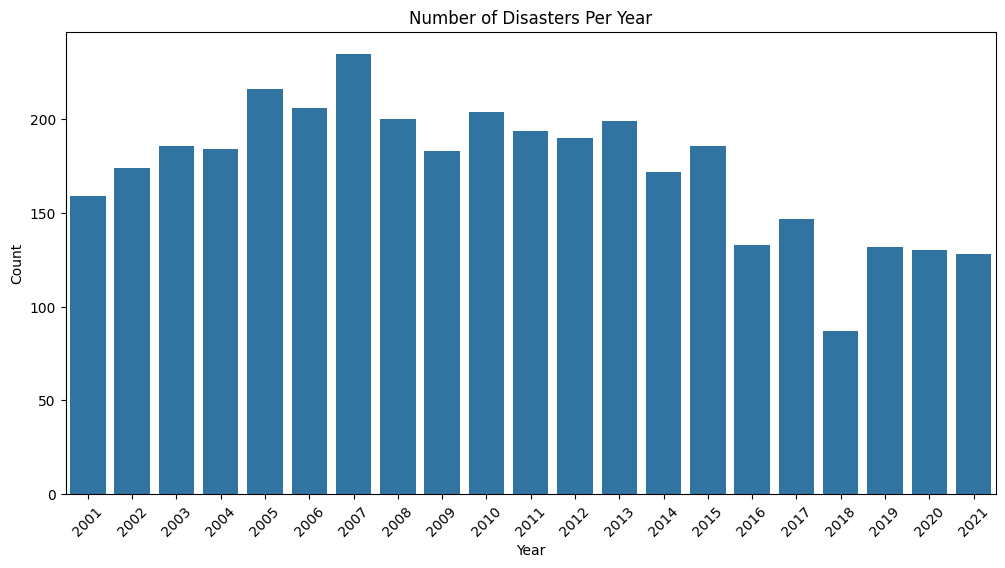

In [ ]:
#Disaster frequency by year
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_disasters, x='year', order=cleaned_disasters['year'].sort_values().unique())
plt.title("Number of Disasters Per Year")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()


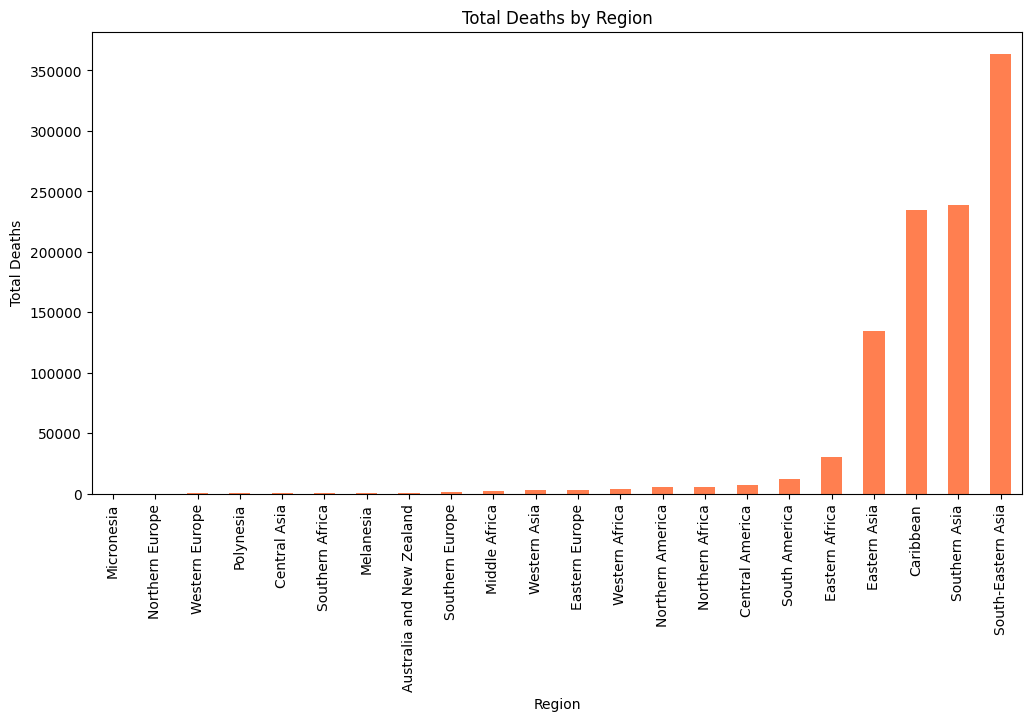

In [ ]:
#Total deaths by region
region_deaths = cleaned_disasters.groupby('region')['total_deaths'].sum().sort_values()
plt.figure(figsize=(12, 6))
region_deaths.plot(kind='bar', color='coral')
plt.title("Total Deaths by Region")
plt.ylabel("Total Deaths")
plt.xlabel("Region")
plt.show()

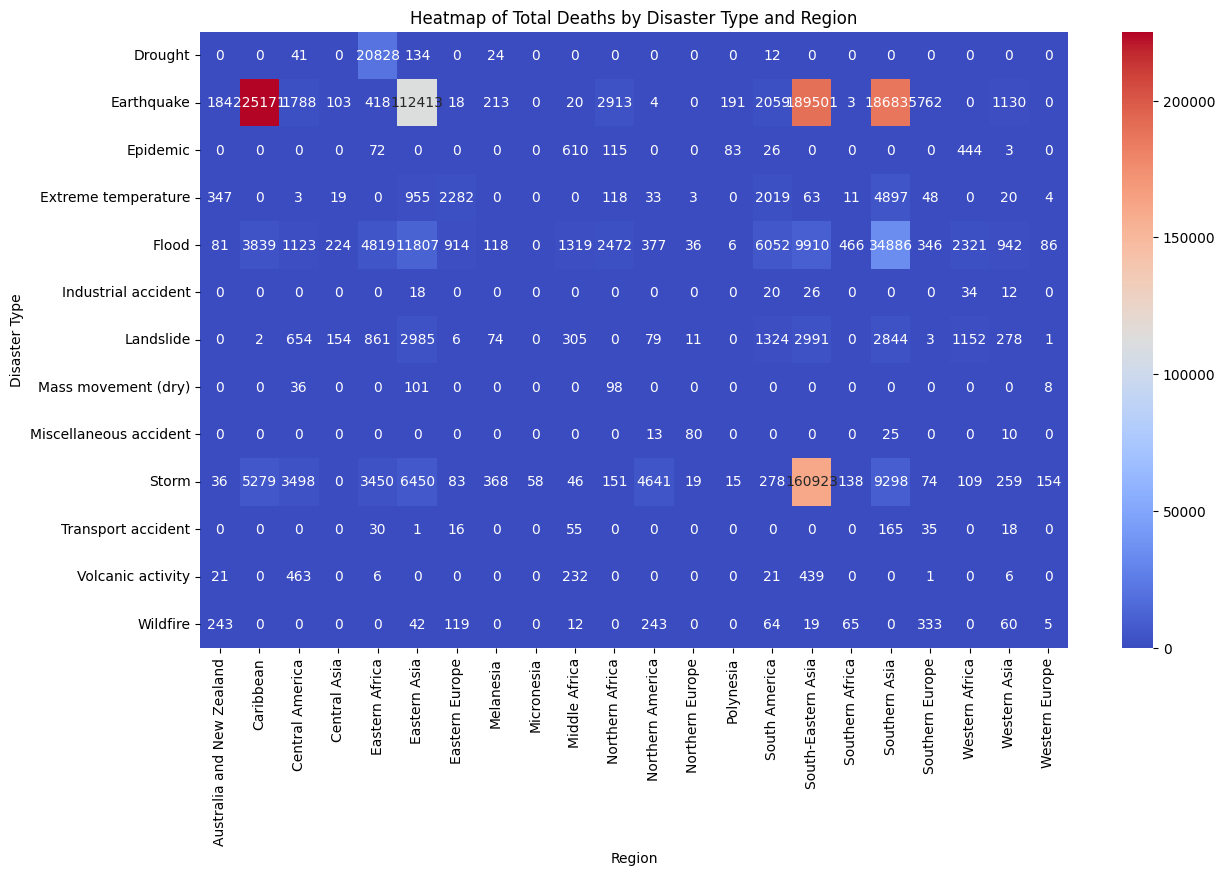

In [ ]:
#Disaster type heatmap (type vs region)
pivot_table = cleaned_disasters.pivot_table(values='total_deaths', index='disaster_type', columns='region', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Heatmap of Total Deaths by Disaster Type and Region")
plt.ylabel("Disaster Type")
plt.xlabel("Region")
plt.show()

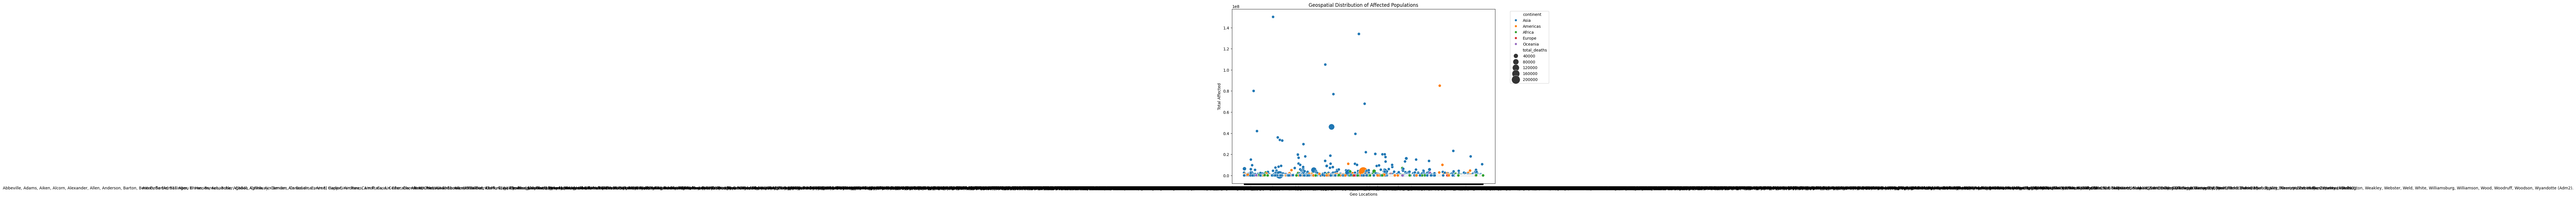

In [ ]:
#Geospatial visualization using scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_disasters, x='geo_locations', y='total_affected', hue='continent', size='total_deaths', sizes=(50, 500), palette='tab10')
plt.title("Geospatial Distribution of Affected Populations")
plt.ylabel("Total Affected")
plt.xlabel("Geo Locations")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
cleaned_disasters.columns

Index(['year', 'disaster_group', 'disaster_subgroup', 'disaster_type',
       'disaster_subtype', 'country_origin', 'country_origin(ISO)', 'region',
       'continent', 'location', 'total_deaths', 'total_affected',
       'geo_locations'],
      dtype='object')

In [ ]:
cleaned_disasters.dtypes

,0
year,int64
disaster_group,object
disaster_subgroup,object
disaster_type,object
disaster_subtype,object
country_origin,object
country_origin(ISO),object
region,object
continent,object
location,object


In [ ]:

engine = create_engine('sqlite:///content/Refugee_migration.db', echo=False)
engine

Engine(sqlite:///content/Refugee_migration.db)

In [ ]:
from sqlalchemy.exc import IntegrityError, OperationalError

import os
if not os.path.exists('content'):
    os.makedirs('content')

try:

    engine = create_engine('sqlite:///content/Refugee_migration.db', echo=False)

    # Save dataframes to the SQLite database
    demographic_ml_df.to_sql(name='demographic_ml', con=engine, if_exists='replace', index=True)
    event_ml_df.to_sql(name='event_ml', con=engine, if_exists='replace', index=True)
    cleaned_conflict.to_sql(name='cleaned_conflict', con=engine, if_exists='replace', index=True)
    cleaned_disasters.to_sql(name='cleaned_disasters', con=engine, if_exists='replace', index=True)

except IntegrityError as e:
    print(f"Integrity error: {e}")
except OperationalError as e:
    print(f"Operational error: {e}")

In [ ]:
#Demographics data

In [ ]:

demographics_df=pd.read_csv("/content/demographics.csv",header=0)
demographics_df

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0,5
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0,6
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341,660
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8


In [ ]:
demographics_df.columns


Index(['Year', 'Country of origin', 'Country of origin (ISO)',
       'Country of asylum', 'Country of asylum (ISO)', 'Female 0 - 4',
       'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60',
       'Female other', 'Female total', 'Male 0 - 4', 'Male 5 - 11',
       'Male 12 - 17', 'Male 18 - 59', 'Male 60', 'Male other', 'Male total',
       'Total'],
      dtype='object')

In [ ]:
demographics_df_dropped= demographics_df.drop(['Total'], axis="columns")
demographics_df_dropped

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8


In [ ]:
demo_rep=demographics_df_dropped.replace(to_replace="TÃ¼rkiye",
           value="Turkey")
demo_rep

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8


In [ ]:
demo_rep.dtypes

,0
Year,int64
Country of origin,object
Country of origin (ISO),object
Country of asylum,object
Country of asylum (ISO),object
Female 0 - 4,int64
Female 5 - 11,int64
Female 12 - 17,int64
Female 18 - 59,int64
Female 60,int64


In [ ]:
demo_rep.duplicated().sum()

0

In [ ]:
demo_rep.isnull().sum()

,0
Year,0
Country of origin,0
Country of origin (ISO),793
Country of asylum,0
Country of asylum (ISO),0
Female 0 - 4,0
Female 5 - 11,0
Female 12 - 17,0
Female 18 - 59,0
Female 60,0


In [ ]:
cleaned_demographics =demo_rep.dropna()
cleaned_demographics

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8


In [ ]:
cleaned_demographics.isnull().sum()

,0
Year,0
Country of origin,0
Country of origin (ISO),0
Country of asylum,0
Country of asylum (ISO),0
Female 0 - 4,0
Female 5 - 11,0
Female 12 - 17,0
Female 18 - 59,0
Female 60,0


In [ ]:

cleaned_demographics['Total gender'] =cleaned_demographics ['Female total']+ cleaned_demographics['Male total']
cleaned_demographics

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total gender
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0,5
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0,6
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341,660
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8


In [ ]:

cleaned_demographics.columns

Index(['Year', 'Country of origin', 'Country of origin (ISO)',
       'Country of asylum', 'Country of asylum (ISO)', 'Female 0 - 4',
       'Female 5 - 11', 'Female 12 - 17', 'Female 18 - 59', 'Female 60',
       'Female other', 'Female total', 'Male 0 - 4', 'Male 5 - 11',
       'Male 12 - 17', 'Male 18 - 59', 'Male 60', 'Male other', 'Male total',
       'Total gender'],
      dtype='object')

In [ ]:
cleaned_demographics=cleaned_demographics.rename(columns={'Year':'year','Country of origin':'country_origin','Country of origin (ISO)':'country_origin(ISO)','Country of asylum':'country_asylum',\
                                                         'Country of asylum (ISO)':'country_asylum(ISO)','Female 0 - 4':'female_0to4', 'Female 5 - 11': 'female_5to11','Female 12 - 17':'female_12to17',\
                                                         'Female 18 - 59':'female_18to59','Female 60':'female_60','Female other':'female_other','Female total':'female_total','Male_0to4':'male_0to4',\
                                                         'Male 5 - 11':'male_5to11','Male 12 - 17':'male_12to17','Male 18 - 59':'male_18to59','Male 60':'male_60','Male other':'male_other',\
                                                         'Male total':'male_total','Total gender':'total_gender'})
cleaned_demographics


,year,country_origin,country_origin(ISO),country_asylum,country_asylum(ISO),female_0to4,female_5to11,female_12to17,female_18to59,female_60,female_other,female_total,Male 0 - 4,male_5to11,male_12to17,male_18to59,male_60,male_other,male_total,total_gender
0,2001,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,5,0,0,5,5
1,2001,Iraq,IRQ,Afghanistan,AFG,0,5,0,0,0,0,5,0,0,0,0,0,0,0,5
2,2001,Iraq,IRQ,Albania,ALB,0,0,0,0,0,0,0,0,0,0,7,0,0,7,7
3,2001,North Macedonia,MKD,Albania,ALB,0,0,0,6,0,0,6,0,0,0,0,0,0,0,6
4,2001,Serbia and Kosovo: S/RES/1244 (1999),SRB,Albania,ALB,14,20,18,89,8,0,149,14,18,16,45,18,0,111,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74568,2021,Rwanda,RWA,Zimbabwe,ZWE,29,48,49,179,14,0,319,25,54,51,188,23,0,341,660
74569,2021,Somalia,SOM,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,13,0,0,13,13
74570,2021,Sudan,SDN,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8
74571,2021,South Sudan,SSD,Zimbabwe,ZWE,0,0,0,0,0,0,0,0,0,0,8,0,0,8,8


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/conflict.zip") as myzip:
    conflict_data = myzip.open("conflict.csv")

conflict_df = pd.read_csv(conflict_data)

conflict_df.head()


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,00:00.0,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,00:00.0,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,00:00.0,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,00:00.0,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,00:00.0,6,0,0,0,6,6,6,700,NaN


In [ ]:
conflict_df.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [ ]:
conflict_df_col= conflict_df.drop(['id', 'relid','active_year', 'code_status','type_of_violence','conflict_dset_id', 'conflict_new_id',\
                                  'dyad_dset_id','dyad_new_id','side_a_dset_id', 'side_a_new_id', 'side_a','side_b_dset_id',\
                                   'side_b_new_id', 'side_b', 'number_of_sources','source_article', 'source_office', 'source_date',\
                                   'source_headline','source_original', 'where_prec','adm_1', 'adm_2','geom_wkt', 'priogrid_gid', \
                                  'country_id','event_clarity', 'date_prec', 'date_start', 'date_end','deaths_a',\
                                  'deaths_b', 'deaths_unknown','deaths_civilians','high', 'low','gwnoa', 'gwnob'], axis="columns")
conflict_df_col

,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,best
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,1989,Afghanistan: Government,Government of Afghanistan - Jam'iyyat-i Islami...,Nangarhar province,Nangarhar province,34.333330,70.416670,Afghanistan,Asia,6
...,...,...,...,...,...,...,...,...,...,...
293629,1989,Renamo - Civilians,Renamo - Civilians,Chipinge district,Chipinge district,-20.500000,32.500000,Zimbabwe (Rhodesia),Africa,9
293630,1989,Renamo - Civilians,Renamo - Civilians,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Near the eastern border with...,-19.000000,32.500000,Zimbabwe (Rhodesia),Africa,9
293631,1990,Renamo - Civilians,Renamo - Civilians,Nyamaropa village,Nyamaropa village,-18.000000,32.833333,Zimbabwe (Rhodesia),Africa,7
293632,1990,Renamo - Civilians,Renamo - Civilians,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Pungwe communal lands settle...,-19.000000,32.500000,Zimbabwe (Rhodesia),Africa,1


In [ ]:
conflict_df_col.columns

Index(['year', 'conflict_name', 'dyad_name', 'where_coordinates',
       'where_description', 'latitude', 'longitude', 'country', 'region',
       'best'],
      dtype='object')

In [ ]:
conflict_df_col_renamed=conflict_df_col.rename(columns={'year':'year','best':'deaths_civilians'})
conflict_df_col_renamed


,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,1989,Afghanistan: Government,Government of Afghanistan - Jam'iyyat-i Islami...,Nangarhar province,Nangarhar province,34.333330,70.416670,Afghanistan,Asia,6
...,...,...,...,...,...,...,...,...,...,...
293629,1989,Renamo - Civilians,Renamo - Civilians,Chipinge district,Chipinge district,-20.500000,32.500000,Zimbabwe (Rhodesia),Africa,9
293630,1989,Renamo - Civilians,Renamo - Civilians,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Near the eastern border with...,-19.000000,32.500000,Zimbabwe (Rhodesia),Africa,9
293631,1990,Renamo - Civilians,Renamo - Civilians,Nyamaropa village,Nyamaropa village,-18.000000,32.833333,Zimbabwe (Rhodesia),Africa,7
293632,1990,Renamo - Civilians,Renamo - Civilians,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Pungwe communal lands settle...,-19.000000,32.500000,Zimbabwe (Rhodesia),Africa,1


In [ ]:
data_by_index=conflict_df_col_renamed.set_index("year")
data_by_index=data_by_index.drop([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000], axis=0)
data_by_index


,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
year,,,,,,,,,
2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
2002,Afghanistan: Government,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul city,Kabul city,34.531094,69.162796,Afghanistan,Asia,30
...,...,...,...,...,...,...,...,...,...
2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,"Warren park, Harare city",-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mutare town,Mutare,-18.975973,32.650092,Zimbabwe (Rhodesia),Africa,1
2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,Harare Central Business District,-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1


In [ ]:
conflict_df_dropped_rows=data_by_index.reset_index()
conflict_df_dropped_rows


,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,2002,Afghanistan: Government,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul city,Kabul city,34.531094,69.162796,Afghanistan,Asia,30
...,...,...,...,...,...,...,...,...,...,...
242066,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,"Warren park, Harare city",-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
242067,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mutare town,Mutare,-18.975973,32.650092,Zimbabwe (Rhodesia),Africa,1
242068,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,Harare Central Business District,-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
242069,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mwenezi district,Mwenezi,-21.358380,30.706680,Zimbabwe (Rhodesia),Africa,2


In [ ]:
conflict_df_dropped_rows.dtypes

,0
year,int64
conflict_name,object
dyad_name,object
where_coordinates,object
where_description,object
latitude,float64
longitude,float64
country,object
region,object
deaths_civilians,int64


In [ ]:
conflict_df_dropped_rows.duplicated().sum()

41037

In [ ]:
conflict_dup=conflict_df_dropped_rows.drop_duplicates()
conflict_dup


,year,conflict_name,dyad_name,where_coordinates,where_description,latitude,longitude,country,region,deaths_civilians
0,2017,Iraq: Government,Government of Iraq - IS,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,Afghanistan,Asia,6
1,2021,Iraq: Government,Government of Iraq - IS,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,Afghanistan,Asia,183
2,2021,Iraq: Government,Government of Iraq - IS,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,Afghanistan,Asia,2
3,2021,Iraq: Government,Government of Iraq - IS,Kabul city,Kabul city (district 15),34.531094,69.162796,Afghanistan,Asia,10
4,2002,Afghanistan: Government,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul city,Kabul city,34.531094,69.162796,Afghanistan,Asia,30
...,...,...,...,...,...,...,...,...,...,...
242066,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,"Warren park, Harare city",-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
242067,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mutare town,Mutare,-18.975973,32.650092,Zimbabwe (Rhodesia),Africa,1
242068,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Harare town,Harare Central Business District,-17.817777,31.044722,Zimbabwe (Rhodesia),Africa,1
242069,2019,Government of Zimbabwe (Rhodesia) - Civilians,Government of Zimbabwe (Rhodesia) - Civilians,Mwenezi district,Mwenezi,-21.358380,30.706680,Zimbabwe (Rhodesia),Africa,2


In [ ]:
#Asylum-decisions Datav

In [ ]:
asylum_df=pd.read_csv("/content/asylum-decisions.csv",header=0)
asylum_df


,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2000,Afghanistan,AFG,Australia,AUS,G,AR,C,38,0,25,0,63
1,2000,Albania,ALB,Australia,AUS,G,AR,C,5,0,24,0,29
2,2000,Algeria,DZA,Australia,AUS,G,AR,C,5,0,17,0,22
3,2000,Egypt,EGY,Australia,AUS,G,AR,C,21,0,50,5,76
4,2000,Armenia,ARM,Australia,AUS,G,AR,C,0,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2022,Egypt,EGY,Jordan,JOR,U,RA,P,0,0,5,0,5
95802,2022,Sudan,SDN,Jordan,JOR,U,RA,P,0,0,5,0,5
95803,2022,Yemen,YEM,Jordan,JOR,U,RA,P,10,0,0,0,10
95804,2022,Afghanistan,AFG,Syrian Arab Rep.,SYR,U,RA,P,16,0,0,0,16


In [ ]:
asylum_df.columns


Index(['Year', 'Country of origin', 'Country of origin (ISO)',
       'Country of asylum', 'Country of asylum (ISO)', 'Authority',
       'Stage of procedure', 'Cases / Persons', 'Recognized decisions',
       'Complementary protection', 'Rejected decisions', 'Otherwise closed',
       'Total decisions'],
      dtype='object')

In [ ]:
asylum_df_col= asylum_df.drop(['Authority','Stage of procedure', 'Cases / Persons'], axis="columns")
asylum_df_col

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2000,Afghanistan,AFG,Australia,AUS,38,0,25,0,63
1,2000,Albania,ALB,Australia,AUS,5,0,24,0,29
2,2000,Algeria,DZA,Australia,AUS,5,0,17,0,22
3,2000,Egypt,EGY,Australia,AUS,21,0,50,5,76
4,2000,Armenia,ARM,Australia,AUS,0,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...
95801,2022,Egypt,EGY,Jordan,JOR,0,0,5,0,5
95802,2022,Sudan,SDN,Jordan,JOR,0,0,5,0,5
95803,2022,Yemen,YEM,Jordan,JOR,10,0,0,0,10
95804,2022,Afghanistan,AFG,Syrian Arab Rep.,SYR,16,0,0,0,16


In [ ]:
asylum_df_col.columns

Index(['Year', 'Country of origin', 'Country of origin (ISO)',
       'Country of asylum', 'Country of asylum (ISO)', 'Recognized decisions',
       'Complementary protection', 'Rejected decisions', 'Otherwise closed',
       'Total decisions'],
      dtype='object')

In [ ]:
data_by_index_1=asylum_df_col.set_index("Year")
data_by_index_1=data_by_index_1.drop([2000,2022], axis=0)
data_by_index_1


,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
Year,,,,,,,,,
2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...
2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5


In [ ]:
asylum_dropped_rows=data_by_index_1.reset_index()
asylum_dropped_rows

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
asylum_rep=asylum_dropped_rows.replace(to_replace="TÃ¼rkiye",
           value="Turkey")
asylum_rep


,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
asylum_rep=asylum_rep.rename(columns={'Year':'year','Country of origin':'country_origin','Country of origin (ISO)':'country_origin(ISO)','Country of asylum':'country_asylum',\
                                                         'Country of asylum (ISO)':'country_asylum(ISO)','Recognized decisions':'recognized_decisions','Complementary protection':'complementary_protection',\
                                     'Rejected decisions':'rejected_decisions','Otherwise closed':'otherwise_closed','Total decisions':'total_decisions'})
asylum_rep


,year,country_origin,country_origin(ISO),country_asylum,country_asylum(ISO),recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
asylum_dup=asylum_rep.drop_duplicates()
asylum_dup

,year,country_origin,country_origin(ISO),country_asylum,country_asylum(ISO),recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
asylum_dup.duplicated().sum()


0

In [ ]:
cleaned_asylum =asylum_dup.dropna()
cleaned_asylum


,year,country_origin,country_origin(ISO),country_asylum,country_asylum(ISO),recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
cleaned_asylum.isnull().sum()


,0
year,0
country_origin,0
country_origin(ISO),0
country_asylum,0
country_asylum(ISO),0
recognized_decisions,0
complementary_protection,0
rejected_decisions,0
otherwise_closed,0
total_decisions,0


In [ ]:
disasters = cleaned_disasters
demographics = cleaned_demographics

conflict = conflict_dup
asylum = cleaned_asylum

In [ ]:
asylum

,year,country_origin,country_origin(ISO),country_asylum,country_asylum(ISO),recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,Afghanistan,AFG,Australia,AUS,247,0,93,5,345
1,2001,Albania,ALB,Australia,AUS,5,0,13,0,18
2,2001,Algeria,DZA,Australia,AUS,5,0,13,0,18
3,2001,Egypt,EGY,Australia,AUS,12,0,29,5,46
4,2001,Burundi,BDI,Australia,AUS,5,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
88826,2021,Cambodia,KHM,Thailand,THA,5,0,0,0,5
88827,2021,Dem. Rep. of the Congo,COD,Thailand,THA,5,0,0,0,5
88828,2021,Iran (Islamic Rep. of),IRN,Thailand,THA,5,0,0,0,5
88829,2021,Pakistan,PAK,Thailand,THA,15,0,10,0,25


In [ ]:
merged_df = disasters.merge(demographics, how='outer') \
                     .merge(conflict, how='outer') \
                     .merge(asylum, how='outer')

In [ ]:
merged_df

,year,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,country_origin,country_origin(ISO),region,continent,location,...,where_description,latitude,longitude,country,deaths_civilians,recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,NaN,NaN,NaN,NaN,Afghanistan,AFG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0.0,5.0
1,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",...,NaN,NaN,NaN,NaN,NaN,247.0,0.0,93.0,5.0,345.0
2,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",...,NaN,NaN,NaN,NaN,NaN,1667.0,0.0,429.0,5.0,2101.0
3,2001,Natural,Geophysical,Earthquake,Ground movement,Afghanistan,AFG,Southern Asia,Asia,"Panjsher, Parwan, Kapisa provinces",...,NaN,NaN,NaN,NaN,NaN,247.0,0.0,93.0,5.0,345.0
4,2001,Natural,Geophysical,Earthquake,Ground movement,Afghanistan,AFG,Southern Asia,Asia,"Panjsher, Parwan, Kapisa provinces",...,NaN,NaN,NaN,NaN,NaN,1667.0,0.0,429.0,5.0,2101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373433,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Jabal Ash Shawb in Al Quraishyah,14.659722,44.883056,Yemen (North Yemen),0.0,NaN,NaN,NaN,NaN,NaN
373434,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Shabwa,15.000000,47.000000,Yemen (North Yemen),2.0,NaN,NaN,NaN,NaN,NaN
373435,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Lawdar city,13.882824,45.868586,Yemen (North Yemen),4.0,NaN,NaN,NaN,NaN,NaN
373436,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,As Sahah mosque in Al Jalilah area in Ad Dhalee.,13.728991,44.742948,Yemen (North Yemen),0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.columns

Index(['year', 'disaster_group', 'disaster_subgroup', 'disaster_type',
       'disaster_subtype', 'country_origin', 'country_origin(ISO)', 'region',
       'continent', 'location', 'total_deaths', 'total_affected',
       'geo_locations', 'country_asylum', 'country_asylum(ISO)', 'female_0to4',
       'female_5to11', 'female_12to17', 'female_18to59', 'female_60',
       'female_other', 'female_total', 'Male 0 - 4', 'male_5to11',
       'male_12to17', 'male_18to59', 'male_60', 'male_other', 'male_total',
       'total_gender', 'conflict_name', 'dyad_name', 'where_coordinates',
       'where_description', 'latitude', 'longitude', 'country',
       'deaths_civilians', 'recognized_decisions', 'complementary_protection',
       'rejected_decisions', 'otherwise_closed', 'total_decisions'],
      dtype='object')

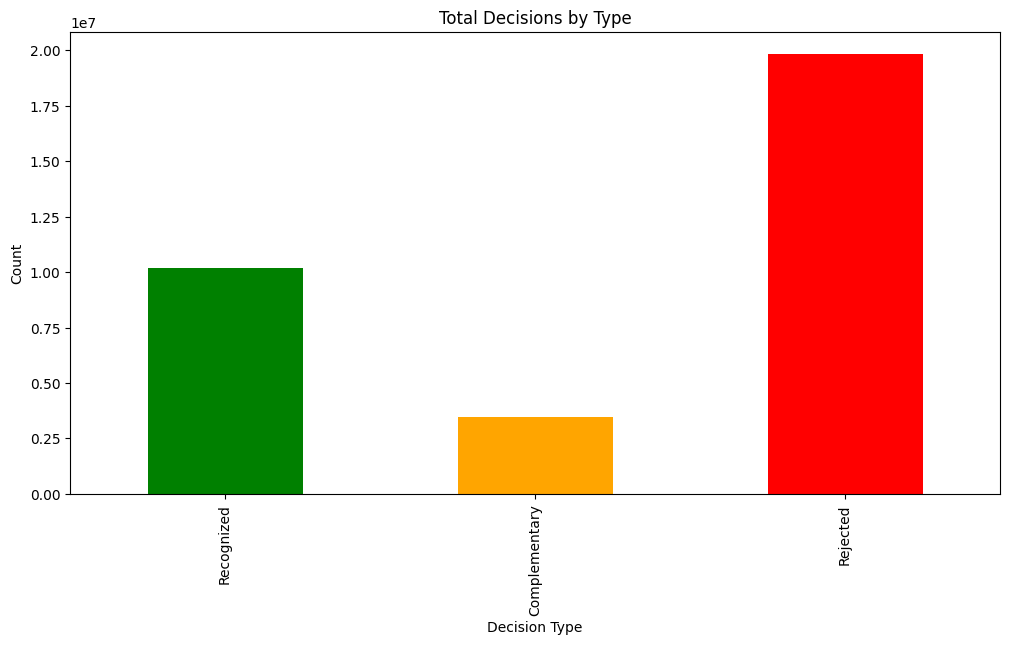

In [ ]:
#Asylum decision trends
plt.figure(figsize=(12, 6))
decision_cols = ['recognized_decisions', 'complementary_protection', 'rejected_decisions']
decision_totals = merged_df[decision_cols].sum()
decision_totals.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Total Decisions by Type")
plt.ylabel("Count")
plt.xlabel("Decision Type")
plt.xticks(ticks=[0, 1, 2], labels=['Recognized', 'Complementary', 'Rejected'])
plt.show()

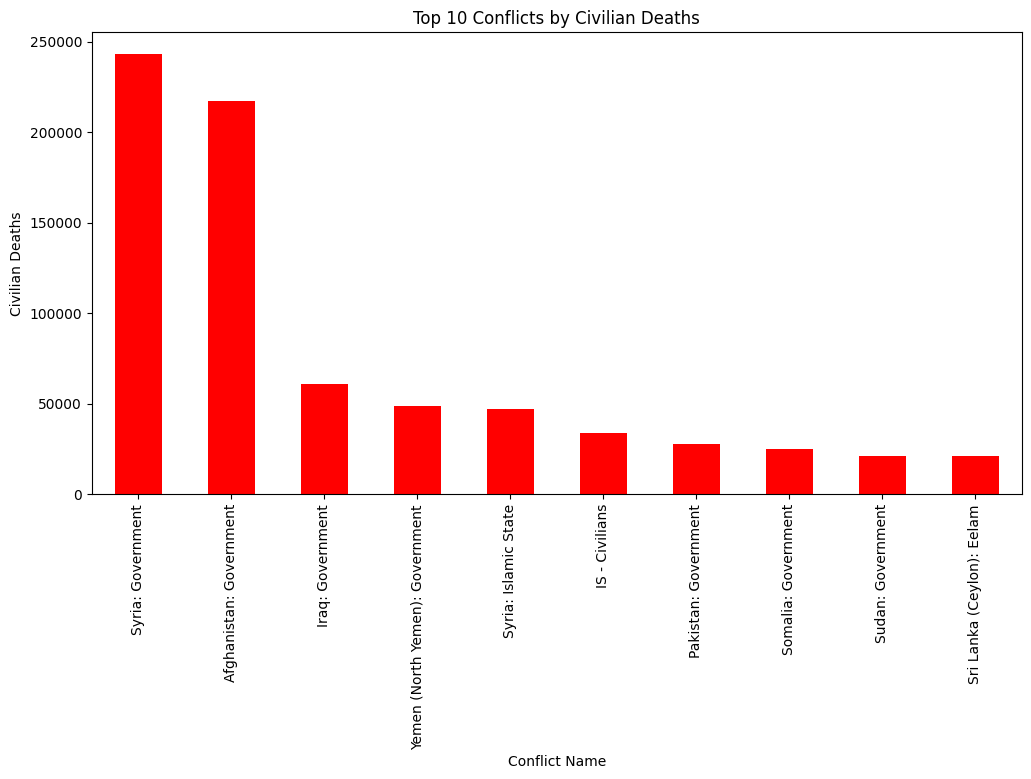

In [ ]:
#Conflict-related deaths
plt.figure(figsize=(12, 6))
conflict_data = merged_df.groupby('conflict_name')['deaths_civilians'].sum().sort_values(ascending=False).head(10)
conflict_data.plot(kind='bar', color='red')
plt.title("Top 10 Conflicts by Civilian Deaths")
plt.ylabel("Civilian Deaths")
plt.xlabel("Conflict Name")
plt.show()

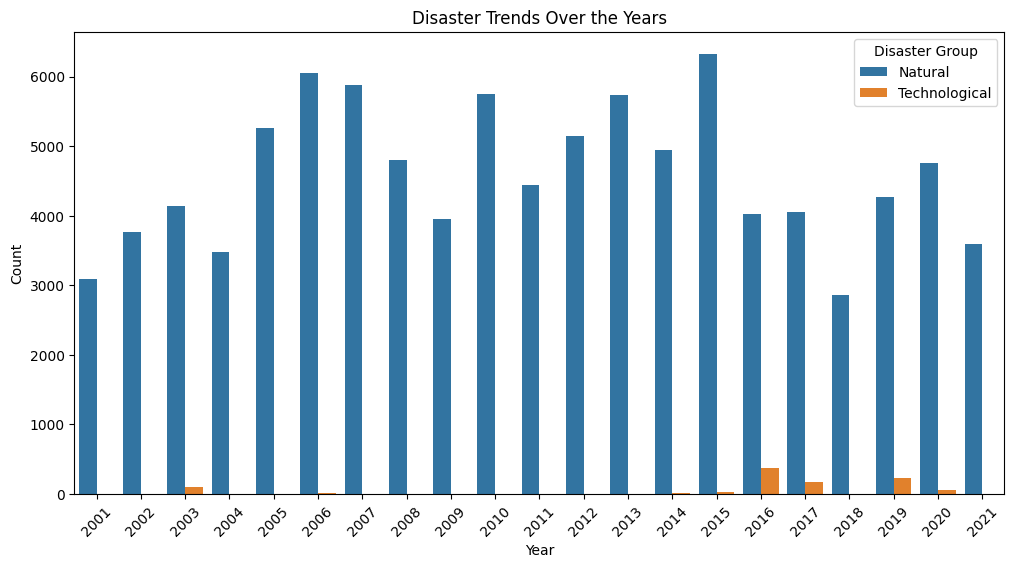

In [ ]:
#Yearly trends in disasters
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='year', hue='disaster_group', order=sorted(merged_df['year'].dropna().unique()))
plt.title("Disaster Trends Over the Years")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend(title="Disaster Group")
plt.show()


In [ ]:
merged_df

,year,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,country_origin,country_origin(ISO),region,continent,location,...,where_description,latitude,longitude,country,deaths_civilians,recognized_decisions,complementary_protection,rejected_decisions,otherwise_closed,total_decisions
0,2001,NaN,NaN,NaN,NaN,Afghanistan,AFG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0.0,5.0
1,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",...,NaN,NaN,NaN,NaN,NaN,247.0,0.0,93.0,5.0,345.0
2,2001,Natural,Meteorological,Extreme temperature,Cold wave,Afghanistan,AFG,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",...,NaN,NaN,NaN,NaN,NaN,1667.0,0.0,429.0,5.0,2101.0
3,2001,Natural,Geophysical,Earthquake,Ground movement,Afghanistan,AFG,Southern Asia,Asia,"Panjsher, Parwan, Kapisa provinces",...,NaN,NaN,NaN,NaN,NaN,247.0,0.0,93.0,5.0,345.0
4,2001,Natural,Geophysical,Earthquake,Ground movement,Afghanistan,AFG,Southern Asia,Asia,"Panjsher, Parwan, Kapisa provinces",...,NaN,NaN,NaN,NaN,NaN,1667.0,0.0,429.0,5.0,2101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373433,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Jabal Ash Shawb in Al Quraishyah,14.659722,44.883056,Yemen (North Yemen),0.0,NaN,NaN,NaN,NaN,NaN
373434,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Shabwa,15.000000,47.000000,Yemen (North Yemen),2.0,NaN,NaN,NaN,NaN,NaN
373435,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,Lawdar city,13.882824,45.868586,Yemen (North Yemen),4.0,NaN,NaN,NaN,NaN,NaN
373436,2021,NaN,NaN,NaN,NaN,NaN,NaN,Middle East,NaN,NaN,...,As Sahah mosque in Al Jalilah area in Ad Dhalee.,13.728991,44.742948,Yemen (North Yemen),0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
	#•	Country information: country_origin, region, continent.
	#•	Disaster data: disaster_type, total_deaths, total_affected.
	#•	Conflict data: conflict_name, deaths_civilians.
	#•	Demographics: female_total, male_total.

#postive or nigative of imigrants and migrantes from a spesific country


In [ ]:
df2 = merged_df[['country_origin', 'region',"continent","disaster_type","total_deaths","total_affected",
                                                             "conflict_name","deaths_civilians","female_total","male_total"
                                                             ]].copy()

In [ ]:
df2

,country_origin,region,continent,disaster_type,total_deaths,total_affected,conflict_name,deaths_civilians,female_total,male_total
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Southern Asia,Asia,Extreme temperature,150.0,100000.0,NaN,NaN,0.0,0.0
2,Afghanistan,Southern Asia,Asia,Extreme temperature,150.0,100000.0,NaN,NaN,0.0,0.0
3,Afghanistan,Southern Asia,Asia,Earthquake,4.0,270.0,NaN,NaN,0.0,0.0
4,Afghanistan,Southern Asia,Asia,Earthquake,4.0,270.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
373433,NaN,Middle East,NaN,NaN,NaN,NaN,Yemen (North Yemen): Islamic State,0.0,NaN,NaN
373434,NaN,Middle East,NaN,NaN,NaN,NaN,Forces of Hadi - STC,2.0,NaN,NaN
373435,NaN,Middle East,NaN,NaN,NaN,NaN,Forces of Hadi - STC,4.0,NaN,NaN
373436,NaN,Middle East,NaN,NaN,NaN,NaN,Forces of Hadi - STC,0.0,NaN,NaN


In [ ]:
columns=["country_id_alpha", "country_name", "year", "annual_growth_rate", "country_area", "population_density", "total_fertility_rate", "crude_birth_rate", "life_expectancy_at_birth", "infant_mortality_rate", "crude_death_rate", "total_country_population", "total_migrant_population", "migrant_male_population", "migrant_female_population", "net_migration_rate", "migration_flag"]
migration_data_df = migration_data_df[columns]
migration_data_df.head()

,country_id_alpha,country_name,year,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population,net_migration_rate,migration_flag
0,AF,Afghanistan,1990,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,13568282,57686,32558,25128,-51.23,f
1,AF,Afghanistan,1995,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,19445013,71522,39105,32417,2.68,t
2,AF,Afghanistan,2000,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,22461349,75917,42848,33069,-45.30,f
3,AF,Afghanistan,2005,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,26332646,87314,49281,38033,9.43,t
4,AF,Afghanistan,2010,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,29116851,102276,57726,44550,-3.25,f


In [ ]:
migration_data_df["migration_flag"] = migration_data_df["migration_flag"].replace({"t": 1, "f": 0})
migration_data_df.head()

,country_id_alpha,country_name,year,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population,net_migration_rate,migration_flag
0,AF,Afghanistan,1990,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,13568282,57686,32558,25128,-51.23,0
1,AF,Afghanistan,1995,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,19445013,71522,39105,32417,2.68,1
2,AF,Afghanistan,2000,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,22461349,75917,42848,33069,-45.30,0
3,AF,Afghanistan,2005,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,26332646,87314,49281,38033,9.43,1
4,AF,Afghanistan,2010,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,29116851,102276,57726,44550,-3.25,0


In [ ]:
X = pd.get_dummies(migration_data_df.drop(columns=["migration_flag", "country_id_alpha", "country_name", "year", "country_area", "net_migration_rate"]))

y = migration_data_df["migration_flag"]

In [ ]:
X.describe()

,annual_growth_rate,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1.419000e+03,1.419000e+03,1.419000e+03,1.419000e+03
mean,1.278055,384.949824,3.031473,22.896965,69.572685,33.215934,8.417052,2.969279e+07,8.120876e+05,4.187911e+05,3.932964e+05
std,3.967187,1762.000530,1.617946,11.612724,9.399712,32.491108,3.642378,1.223040e+08,2.174123e+06,1.116949e+06,1.080226e+06
min,-115.363000,0.000000,0.879600,6.630000,29.470000,1.540000,1.200000,3.951000e+03,1.080000e+02,6.100000e+01,4.700000e+01
25%,0.423000,29.100000,1.771700,12.920000,64.255000,8.910000,5.960000,5.821105e+05,2.802700e+04,1.465150e+04,1.280450e+04
50%,1.237000,77.300000,2.450000,20.040000,71.680000,20.700000,7.630000,5.354669e+06,1.522350e+05,7.743600e+04,7.459400e+04
75%,2.334500,182.000000,4.104150,31.535000,76.430000,48.505000,10.110000,1.869113e+07,6.460165e+05,3.201200e+05,3.056490e+05
max,34.084000,22332.000000,8.270000,57.270000,89.780000,180.130000,32.940000,1.404032e+09,5.063284e+07,2.447900e+07,2.615384e+07


In [ ]:
y.value_counts()

,count
migration_flag,
0,803
1,616


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
predictions = rf_model.predict(X_test_scaled)

In [ ]:
predictions

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [ ]:
acc_score = accuracy_score(y_test, predictions)

In [ ]:
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,182,19
Actual 1,23,131


In [ ]:
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8816901408450705


In [ ]:

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       201
           1       0.87      0.85      0.86       154

    accuracy                           0.88       355
   macro avg       0.88      0.88      0.88       355
weighted avg       0.88      0.88      0.88       355



In [ ]:
importances = rf_model.feature_importances_
importances

array([0.26337516, 0.05410545, 0.09919943, 0.0954671 , 0.07982306,
       0.11184061, 0.05957267, 0.07140414, 0.05042393, 0.05838335,
       0.0564051 ])

In [ ]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2633751628978324, 'annual_growth_rate'),
 (0.11184060979423441, 'infant_mortality_rate'),
 (0.09919943422909268, 'total_fertility_rate'),
 (0.09546709689451482, 'crude_birth_rate'),
 (0.07982306271106136, 'life_expectancy_at_birth'),
 (0.07140413884219818, 'total_country_population'),
 (0.059572666928345154, 'crude_death_rate'),
 (0.058383349670501204, 'migrant_male_population'),
 (0.056405103925736166, 'migrant_female_population'),
 (0.05410544677396075, 'population_density'),
 (0.05042392733252281, 'total_migrant_population')]

In [ ]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer1 = 8

nn = Sequential()

nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(Dropout(.2))

nn.add(Dense(units=hidden_nodes_layer1, activation="relu"))
nn.add(Dropout(.2))

nn.add(Dense(units=1, activation="sigmoid"))

nn.compile(
    loss = "binary_crossentropy",
    optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)



In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  # Stops if no improvement
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Reduces LR if stuck
]


In [ ]:
#testing the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4358 - loss: 0.7270 - val_accuracy: 0.3897 - val_loss: 0.7219 - learning_rate: 0.0010
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4956 - loss: 0.7132 - val_accuracy: 0.4742 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4666 - loss: 0.7039 - val_accuracy: 0.5023 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 0.6914 - val_accuracy: 0.5587 - val_loss: 0.6797 - learning_rate: 0.0010
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5783 - loss: 0.6843 - val_accuracy: 0.6056 - val_loss: 0.6709 - learning_rate: 0.0010
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5918 - loss: 0.6798 - val_accuracy: 0.6385 - val_loss: 0.6618 - learning_rate: 0.0010
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5605 - loss: 0.6804 - val_ac

In [ ]:
model_loss , model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - 3ms/step - accuracy: 0.9239 - loss: 0.2462
Loss: 0.24623656272888184, Accuracy: 0.9239436388015747


In [ ]:
predictions = nn.predict(X_test_scaled)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
print("Prediction probabilities:\n", predictions[:10])  # Show the first 10 predictions

Prediction probabilities:
 [[0.9020955 ]
 [0.8808316 ]
 [0.06841164]
 [0.0985931 ]
 [0.2886635 ]
 [0.09689963]
 [0.41608343]
 [0.9721504 ]
 [0.85567385]
 [0.45606822]]


In [ ]:
predicted_classes = (predictions > 0.5).astype("int32")
print("Predicted classes:\n", predicted_classes[:10])

Predicted classes:
 [[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [ ]:
results = pd.DataFrame({
    "Actual": y_test[:10],  # Replace [:10] with full dataset if needed
    "Predicted": predicted_classes[:10].flatten()
})

print(results)

      Actual  Predicted
1344       1          1
965        1          1
936        0          0
1254       0          0
906        0          0
181        1          0
1028       0          0
926        1          1
267        1          1
550        1          0


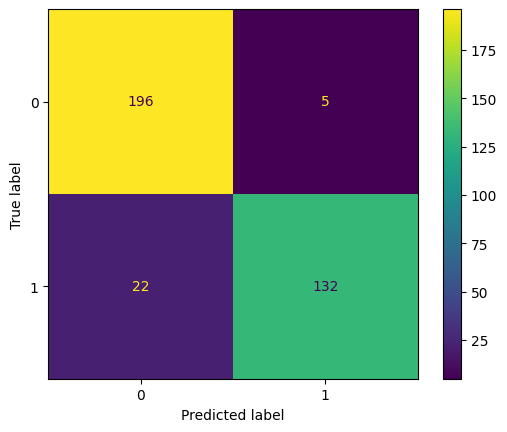

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

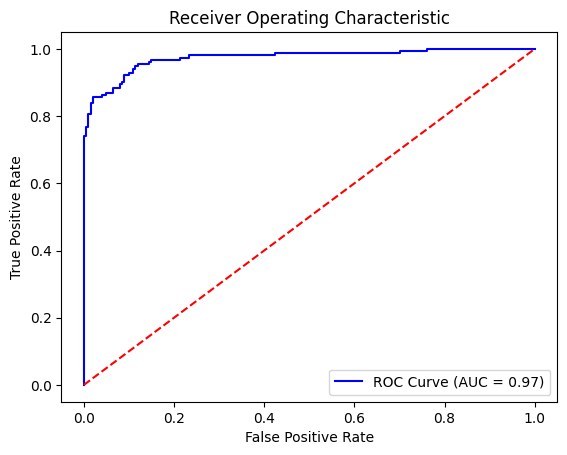

In [ ]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
df = migration_data_df.dropna()

In [ ]:
df

,country_id_alpha,country_name,year,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population,net_migration_rate,migration_flag
0,AF,Afghanistan,1990,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,13568282,57686,32558,25128,-51.23,0
1,AF,Afghanistan,1995,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,19445013,71522,39105,32417,2.68,1
2,AF,Afghanistan,2000,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,22461349,75917,42848,33069,-45.30,0
3,AF,Afghanistan,2005,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,26332646,87314,49281,38033,9.43,1
4,AF,Afghanistan,2010,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,29116851,102276,57726,44550,-3.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,ZW,Zimbabwe,2000,0.777,386847,31.1,3.9183,32.85,44.06,71.29,17.32,12047427,410109,233881,176228,-7.76,0
1415,ZW,Zimbabwe,2005,-0.064,386847,31.7,3.8550,33.92,45.28,61.83,16.97,12270970,402226,229254,172972,-17.59,0
1416,ZW,Zimbabwe,2010,0.962,386847,32.9,4.1050,35.95,53.10,49.85,12.59,12721852,398307,227201,171106,-13.74,0
1417,ZW,Zimbabwe,2015,1.306,386847,34.7,4.0200,34.64,58.95,34.39,10.72,13415831,400482,225653,174829,-10.86,0


# **Predict future migration**

v2

In [ ]:
features = ['total_migrant_population', 'net_migration_rate', 'population_density',
            'total_fertility_rate', 'crude_birth_rate', 'crude_death_rate']
target = 'annual_growth_rate'

X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
migration_data = df[['year', 'total_migrant_population']].set_index('year')
migration_data

,total_migrant_population
year,
1990,57686
1995,71522
2000,75917
2005,87314
2010,102276
...,...
2000,410109
2005,402226
2010,398307


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
migration_scaled = scaler.fit_transform(migration_data)
migration_scaled

array([[0.00113717],
       [0.00141043],
       [0.00149723],
       ...,
       [0.00786446],
       [0.00790742],
       [0.00821668]])

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 5
X_seq, y_seq = create_sequences(migration_scaled, seq_length)


In [ ]:
train_size = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]


In [ ]:

from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1), return_sequences=True),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.7328e-04 - val_loss: 0.0041
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.4106e-04 - val_loss: 0.0040
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1427e-04 - val_loss: 0.0040
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1026e-04 - val_loss: 0.0040
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1382e-04 - val_loss: 0.0041
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2781e-04 - val_loss: 0.0042
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9753e-04 - val_loss: 0.0044
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4280e-04 - val_loss: 0.0045
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Future prediction
last_sequence = X_seq[-1]  # Take the last sequence from the dataset
future_predictions = []
for _ in range(10):  # Predict for 10 future years
    next_pred = model.predict(last_sequence[np.newaxis, :, :])
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], [[next_pred[0, 0]]], axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
future_predictions_original_scale = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [ ]:
historical_years = migration_data.index
historical_migration = migration_data['total_migrant_population']
future_years = np.arange(historical_years.max() + 1, historical_years.max() + 11)

all_years = np.concatenate([historical_years, future_years])
all_migration = np.concatenate([historical_migration, future_predictions_original_scale.flatten()])


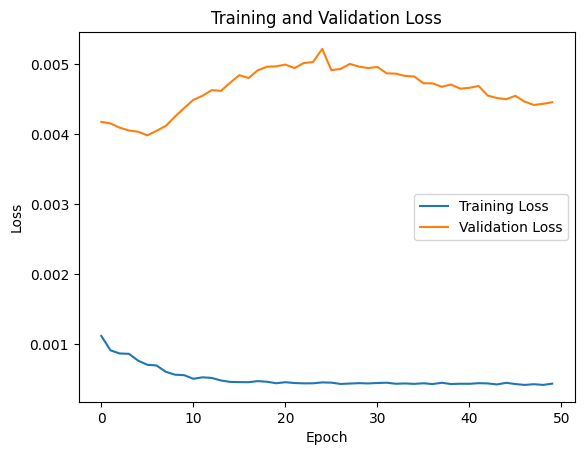

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

v1


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))

        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

        self.learning_rate = learning_rate

    def forward_pass(self, X):
        # Hidden Layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)

        #Output Layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward_pass(self, X, y, output):
        # Calculate the error
        error = y - output

        # Gradient for output layer
        d_output = error * sigmoid_derivative(output)

        # Gradient for hidden layer
        hidden_error = np.dot(d_output, self.weights_hidden_output.T)
        d_hidden = hidden_error * relu_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, d_output)
        self.bias_output += self.learning_rate * np.sum(d_output, axis=0, keepdims=True)

        self.weights_input_hidden += self.learning_rate * np.dot(X.T, d_hidden)
        self.bias_hidden += self.learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward_pass(X)

            # Backward pass
            self.backward_pass(X, y, output)

            # Calculate loss
            if epoch % 10 == 0:
                loss = mean_squared_error(y, output)
                print(f"Epoch {epoch}/{epochs} - Loss: {loss}")

    def predict(self, X):
        return self.forward_pass(X)

In [ ]:
features = ['net_migration_rate', 'total_fertility_rate', 'population_density']
target = 'annual_growth_rate'

In [ ]:
df = migration_data_df.dropna(subset=features + [target])
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
input_size = X_train.shape[1]
hidden_layer_sizes = [16, 8]
output_size = 1

#nn = NeuralNetwork(input_size, hidden_layer_sizes, output_size)


#nn.train(X_train, y_train, epochs=1000, learning_rate=0.01)

In [ ]:
#y_pred = nn.predict(X_test)

# Reverse scaling for interpretation
#y_pred_rescaled = scaler.inverse_transform(y_pred)
#y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluate model
#from sklearn.metrics import mean_squared_error, r2_score
#mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
#r2 = r2_score(y_test_rescaled, y_pred_rescaled)

#print(f"Test MSE: {mse}")
#print(f"Test R²: {r2}")

In [ ]:
migration_data_df

,country_id_alpha,country_name,year,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population,net_migration_rate,migration_flag
0,AF,Afghanistan,1990,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,13568282,57686,32558,25128,-51.23,0
1,AF,Afghanistan,1995,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,19445013,71522,39105,32417,2.68,1
2,AF,Afghanistan,2000,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,22461349,75917,42848,33069,-45.30,0
3,AF,Afghanistan,2005,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,26332646,87314,49281,38033,9.43,1
4,AF,Afghanistan,2010,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,29116851,102276,57726,44550,-3.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,ZW,Zimbabwe,2000,0.777,386847,31.1,3.9183,32.85,44.06,71.29,17.32,12047427,410109,233881,176228,-7.76,0
1415,ZW,Zimbabwe,2005,-0.064,386847,31.7,3.8550,33.92,45.28,61.83,16.97,12270970,402226,229254,172972,-17.59,0
1416,ZW,Zimbabwe,2010,0.962,386847,32.9,4.1050,35.95,53.10,49.85,12.59,12721852,398307,227201,171106,-13.74,0
1417,ZW,Zimbabwe,2015,1.306,386847,34.7,4.0200,34.64,58.95,34.39,10.72,13415831,400482,225653,174829,-10.86,0


In [ ]:
features = [
    'annual_growth_rate', 'population_density', 'total_fertility_rate',
    'crude_birth_rate', 'life_expectancy_at_birth', 'infant_mortality_rate',
    'crude_death_rate', 'total_country_population'
]

In [ ]:
target = 'net_migration_rate'

In [ ]:
migration_data_df = migration_data_df.dropna(subset=features + [target])
migration_data_df

,country_id_alpha,country_name,year,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,total_country_population,total_migrant_population,migrant_male_population,migrant_female_population,net_migration_rate,migration_flag
0,AF,Afghanistan,1990,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,13568282,57686,32558,25128,-51.23,0
1,AF,Afghanistan,1995,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,19445013,71522,39105,32417,2.68,1
2,AF,Afghanistan,2000,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,22461349,75917,42848,33069,-45.30,0
3,AF,Afghanistan,2005,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,26332646,87314,49281,38033,9.43,1
4,AF,Afghanistan,2010,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,29116851,102276,57726,44550,-3.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,ZW,Zimbabwe,2000,0.777,386847,31.1,3.9183,32.85,44.06,71.29,17.32,12047427,410109,233881,176228,-7.76,0
1415,ZW,Zimbabwe,2005,-0.064,386847,31.7,3.8550,33.92,45.28,61.83,16.97,12270970,402226,229254,172972,-17.59,0
1416,ZW,Zimbabwe,2010,0.962,386847,32.9,4.1050,35.95,53.10,49.85,12.59,12721852,398307,227201,171106,-13.74,0
1417,ZW,Zimbabwe,2015,1.306,386847,34.7,4.0200,34.64,58.95,34.39,10.72,13415831,400482,225653,174829,-10.86,0


In [ ]:
X = migration_data_df[features]
y = migration_data_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")

Mean Absolute Error (MAE): 2.201628767957747
Mean Squared Error (MSE): 107.54139157636247
R-Squared: 0.8252977339888663


In [ ]:
new_data = pd.DataFrame({
    'annual_growth_rate': [1.5],
    'population_density': [300],
    'total_fertility_rate': [2.1],
    'crude_birth_rate': [12],
    'life_expectancy_at_birth': [78],
    'infant_mortality_rate': [4],
    'crude_death_rate': [7],
    'total_country_population': [50_000_000]
})
new_data_scaled = scaler.transform(new_data)
forecast = model.predict(new_data_scaled)
print(f"Forecasted Net Migration Rate: {forecast[0]}")

Forecasted Net Migration Rate: 7.662000000000003


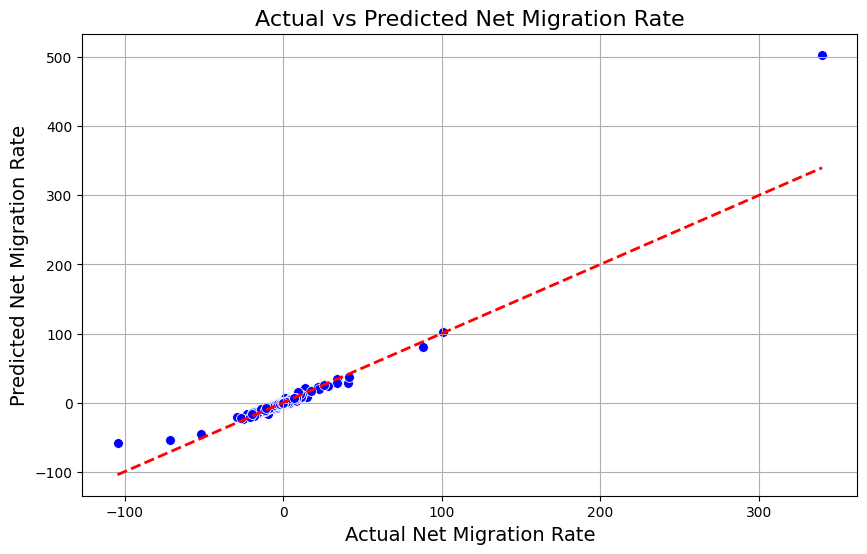

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.title('Actual vs Predicted Net Migration Rate', fontsize=16)
plt.xlabel('Actual Net Migration Rate', fontsize=14)
plt.ylabel('Predicted Net Migration Rate', fontsize=14)
plt.grid(True)
plt.show()

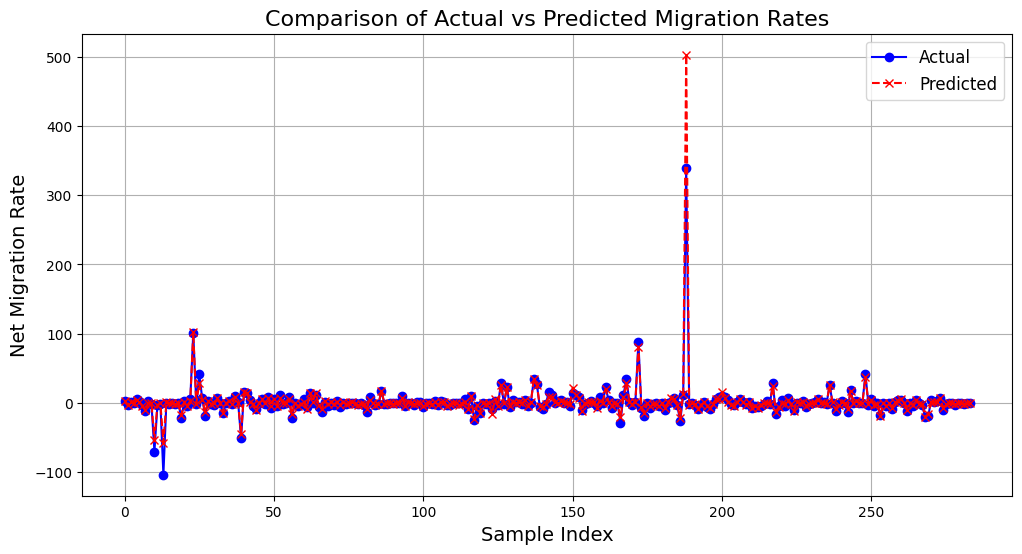

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')
plt.title('Comparison of Actual vs Predicted Migration Rates', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Net Migration Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_scaled)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = xgb_model.predict(X_test_scaled)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 931.6892439417907
R² Score: -0.5135402262230637


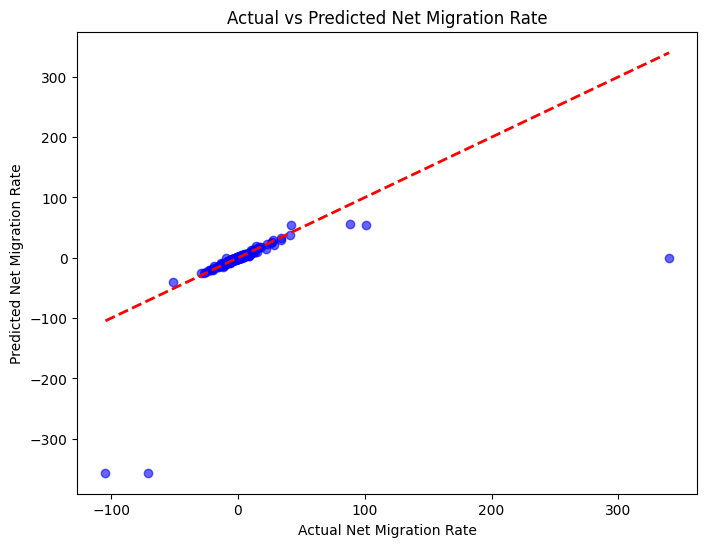

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Net Migration Rate")
plt.xlabel("Actual Net Migration Rate")
plt.ylabel("Predicted Net Migration Rate")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

#testing if i can improve the performanc of the model


In [ ]:
migration_data_df

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
MSE: 40.9643, R²: 0.9335


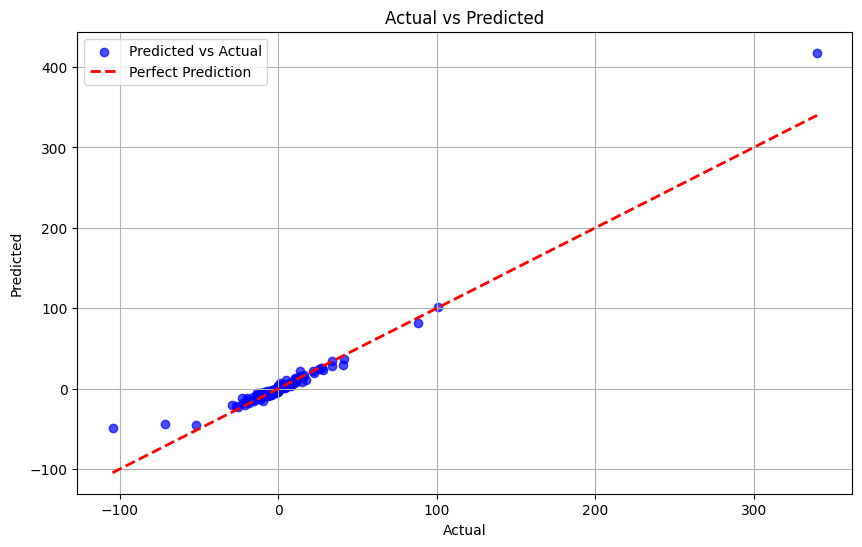

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Identify numeric and categorical columns
numeric_features = [
    'total_country_population', 'annual_growth_rate', 'country_area',
    'population_density', 'total_fertility_rate', 'crude_birth_rate',
    'life_expectancy_at_birth', 'infant_mortality_rate', 'crude_death_rate',
    'total_migrant_population', 'migrant_male_population', 'migrant_female_population'
]
categorical_features = ['migration_flag']

# Separate features and target
X = migration_data_df[numeric_features + categorical_features]
y = migration_data_df['net_migration_rate']

# Preprocessing for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_pipeline = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Model evaluation
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()